# Question 1

In [1]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [2]:
#STEP 2 & 3
#read csv from url
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep ='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#STEP 4
age_mean = users.groupby("occupation").age.mean()
age_mean

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#step 5

#all gender by their occupation
gender_all = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
gender_all.head()



occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [5]:
#Convert to dataframe and rename columns
df_gender = pd.DataFrame(gender_all)
df_gender.rename(columns={"gender":"percent"}, inplace=True)
df_gender.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [6]:
#Add index
Percent_genders = pd.DataFrame(df_gender.reset_index(level=["occupation", "gender"]))
Percent_genders.head()

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [7]:
male_ratio = Percent_genders[Percent_genders["gender"] == "M"].sort_values(by="percent",ascending=False)
male_ratio

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [8]:
#STEP 6
#min and max for each occupation
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [9]:
#STEP 7
#Mean age for each combination of occupation and sex
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
#Step 8
# percentage of women and men for each occupation

Percent_genders

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


## QUESTION 2

In [11]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [12]:
#STEP 2 & 3
#Import the dataset from from url
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [13]:
#Step 4. 
#Select only the Goal column
euro12['Goals']


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [14]:
#Step 5. 
# Euro2012team participant
team_participant = euro12.shape[0]
print("Number of Euro2012team participant:", team_participant)

Number of Euro2012team participant: 16


In [15]:
#Step 6.
#number of columns in the dataset
nos_columns = euro12.shape[1]
print("Number of columns:", nos_columns)

Number of columns: 35


In [16]:
#STEP 7 
#view only columns Team, Yellow Cards and Red Cards and assign them a df

df_discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
df_discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
#STEP 8
#Sorting the teams by Red Cards, then to Yellow Cards
df_discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [18]:
#STEP 8
#mean of Yellow Cards given per Team

mean_yellow_cards_per_team = df_discipline.groupby('Team')['Yellow Cards'].mean().round()

print(mean_yellow_cards_per_team)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [19]:
#STEP 10
#. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [20]:
#STEP 11
#teams that start with G
Starting_withG = euro12[euro12.Team.str.startswith('G')]
Starting_withG

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
#STEP 12
#Select the first 7 columns
first_7_columns = euro12.iloc[:,0:7]

(first_7_columns)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [22]:
#STEP 13
# Selecting all columns except the last 3
Columns_except3= euro12[euro12.columns[0:-3]]
Columns_except3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
#STEP 14
#Shooting Accuracy from England, Italy and Russia
EIR_accuracy = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]
EIR_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [24]:
## QUESTION 3

In [25]:
#STEP 1
# import dependencies
import pandas as pd
import numpy as np

In [26]:
#STEP 2
#Create 3 differents Series, each of length 100,The first a random number from 1 to 4
first_series = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
first_series

0     1
1     3
2     1
3     1
4     4
     ..
95    1
96    1
97    4
98    3
99    1
Length: 100, dtype: int32

In [27]:
#The second a random number from 1 to 3
second_series = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
second_series

0     2
1     1
2     2
3     1
4     3
     ..
95    2
96    3
97    3
98    3
99    1
Length: 100, dtype: int32

In [28]:
#The third a random number from 10,000 to 30,000
Third_series = pd.Series(np.random.randint(10000, high=300001, size=100, dtype='l'))
Third_series 

0     258321
1     148720
2      60827
3      39254
4     136048
       ...  
95     81752
96    119999
97    119095
98    281957
99     53379
Length: 100, dtype: int32

In [29]:
#STEP 3
#Create a DataFrame by joinning the Series by column

df_allseries = pd.concat([first_series, second_series, Third_series], axis=1)
df_allseries.tail()

,0,1,2
95,1,2,81752
96,1,3,119999
97,4,3,119095
98,3,3,281957
99,1,1,53379


In [30]:
#STEP 4
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
df_allseries.rename(columns = {0:'bedrs', 
                               1:'bathrs' ,
                               2:'price_sqr_meter'}, inplace =True) 
df_allseries.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,258321
1,3,1,148720
2,1,2,60827
3,1,1,39254
4,4,3,136048


In [31]:
#STEP 5
#Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

# Concatenate all Series 
bigcolumn = pd.concat([first_series, second_series, Third_series], axis=0)

# Create a DataFrame with the concatenated Series as a single column
df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])

print(df)

    bigcolumn
0           1
1           3
2           1
3           1
4           4
..        ...
95      81752
96     119999
97     119095
98     281957
99      53379

[300 rows x 1 columns]


In [32]:
#STEP 6
#Ops it seems it is going only until index 99. Is it true?

bigcolumn.count()

300

In [33]:
#STEP 7
#Step Reindex the DataFrame so it goes from 0 to 299
df.reset_index(drop=True, inplace=True)
df

,bigcolumn
0,1
1,3
2,1
3,1
4,4
...,...
295,81752
296,119999
297,119095
298,281957


## QUESTION 4

In [47]:
#Step 1. 
#Import the necessary libraries
import pandas as pd
from datetime import datetime


In [48]:
#Step 2 and 3. Import the dataset from the attached file wind.txt

# # Read the whitespace-separated file and set the proper datetime index
# data = pd.read_csv('wind.txt', delim_whitespace=True, parse_dates={'date': [0, 1, 2]})
# data.set_index('date', inplace=True)

# read txt file
path_data= 'wind.txt'
#wind_data = pd.read_csv(txt_data, sep = "\s+", parse_dates = [[0,1,2]]) 
#wind_data
data = pd.read_csv(path_data, sep = "\s+", parse_dates = [[0,1,2]]) 
data


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [53]:
data = pd.read_csv(path_data, sep="\s+", parse_dates=[[0, 1, 2]], index_col=1)  # Assuming 'Yr_Mo_Dy' is the datetime column


In [54]:

# Assume 'data' is your DataFrame with the datetime column named 'datetime'

# function that fixes the century of dates
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime(year, x.month, x.day)

# apply the function fix_century on the column and replace the values
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# Display the DataFrame
data.head()


,Yr_Mo_Dy,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,,
15.04,1961-01-01,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
14.71,1961-01-02,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
18.50,1961-01-03,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
10.58,1961-01-04,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
13.33,1961-01-05,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [55]:
#Step 5
# Convert the index to datetime64[ns] data type
data.index = pd.to_datetime(data.index)
data.head()

,Yr_Mo_Dy,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,,
1970-01-01 00:00:00.000000015,1961-01-01,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1970-01-01 00:00:00.000000014,1961-01-02,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1970-01-01 00:00:00.000000018,1961-01-03,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1970-01-01 00:00:00.000000010,1961-01-04,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1970-01-01 00:00:00.000000013,1961-01-05,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [56]:
#step 6
#how many values are missing for each location over the entire record.They should be ignored in all calculations below.
# Count missing values for each location
missing_values_per_location = data.isnull().sum()

print(missing_values_per_location)


Yr_Mo_Dy    0
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64


In [57]:
#step 7
#Compute how many non-missing values there are in total.
total_non_missing_values = data.notnull().sum()
total_non_missing_values 


Yr_Mo_Dy    6574
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

In [58]:
#step 8
#Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.mean().mean()

print("Mean windspeed:", mean_windspeed)

Mean windspeed: 10.033891010847691


C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\1720232347.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_windspeed = data.mean().mean()


In [43]:
#step 9
#Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Transpose the DataFrame to have locations as rows
loc_stats = loc_stats.T

# Rename the columns for clarity
#loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']

loc_stats

,min,max,mean,std
Yr_Mo_Dy,1961-01-01 00:00:00,1978-12-31 00:00:00,1969-12-31 12:00:00,1897 days 21:28:19.220597120
VAL,0.21,33.37,10.644314,5.267356
ROS,1.5,33.84,11.660526,5.00845
KIL,0.0,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.0,26.16,7.092254,3.968683
DUB,0.0,30.37,9.797343,4.977555
CLA,0.0,31.08,8.495053,4.499449
MUL,0.0,25.88,8.49359,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [44]:
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\3990649138.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['min'] = data.min(axis = 1) # min
C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\3990649138.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['max'] = data.max(axis = 1) # max
C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\3990649138.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  day_stats['mean'] = data.mean(axis = 1) # mean
C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\3990649138.py:8: FutureWarning: Drop

,min,max,mean,std
RPT,,,,
1970-01-01 00:00:00.000000015,9.29,18.50,12.816000,2.875205
1970-01-01 00:00:00.000000014,6.50,17.54,10.999000,3.147791
1970-01-01 00:00:00.000000018,6.17,16.88,10.956000,3.051896
1970-01-01 00:00:00.000000010,1.79,11.75,6.259091,3.088587
1970-01-01 00:00:00.000000013,6.17,13.25,10.384545,2.404676


In [59]:
# # Drop rows with missing values (NaNs)
# data.dropna(inplace=True)

# # Calculate the minimum, maximum, mean, and standard deviation of the windspeeds across all locations at each day
# day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

# # Rename the columns for clarity
# day_stats.columns = ['Min', 'Max', 'Mean', 'Std']

# # Display the DataFrame
# print(day_stats)


day_stats = data.agg(['min', 'max', 'mean', 'std'])

# Transpose the DataFrame to have locations as rows
# loc_stats = loc_stats.T

# Rename the columns for clarity
#loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']

day_stats.head()

,Yr_Mo_Dy,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,1961-01-01 00:00:00,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,1978-12-31 00:00:00,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,1969-12-31 12:00:00,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,1897 days 21:28:19.220597120,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [60]:
#step 10
#Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
# Drop rows with missing values (NaNs)
data.dropna(inplace=True)

day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

# Rename the columns for clarity
day_stats.columns = ['Min', 'Max', 'Mean', 'Std']

print(day_stats)


ValueError: no results

In [61]:
#step 11
#find the average windspeed in January 1961 and January 1962  for each location.

# Filter the data for January dates
january_data = data[data.index.month == 1]

# Group by location and calculate the mean windspeed for January
average_windspeed_january = january_data.mean()


average_windspeed_january



C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\652397100.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average_windspeed_january = january_data.mean()


VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [62]:
#step 12
# Downsample to yearly frequency for each location

yearly_data = data.groupby(data.index.to_period('Y')).mean()
yearly_data 

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\2155017875.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = data.groupby(data.index.to_period('Y')).mean()


,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,
1970,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129


In [63]:
#step 13
#Downsample the record to a monthly frequency for each location.
monthly_data= data.groupby(data.index.to_period('M')).mean()
monthly_data

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\1246942983.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data= data.groupby(data.index.to_period('M')).mean()


,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,
1970-01,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129


In [64]:
#step 14
#Downsample the record to a weekly frequency for each location.
weekly_data= data.groupby(data.index.to_period('W')).mean()
weekly_data

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\3013398183.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data= data.groupby(data.index.to_period('W')).mean()


,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,
1969-12-29/1970-01-04,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129


In [65]:
#step 15
#Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

weekly_data= data.resample('W', loffset=pd.Timedelta(days=1)).mean()

# slice first 52 weeks
weekly_stat = weekly_data.iloc[:52]

 #Calculate statsfor each week
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'])

weekly_data 

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\4158793289.py:4: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_data= data.resample('W', loffset=pd.Timedelta(days=1)).mean()
C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\4158793289.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data= data.resample('W', loffset=pd.Timedelta(days=1)).mean()


,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
RPT,,,,,,,,,,,
1970-01-05,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129


## QUESTION 5 

In [66]:
#STEP 1
#import dependencies
import pandas as pd
import numpy as np

In [67]:
#STEP 2 and 3
#import url and ssigned chipo as the variable

# URL of the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Read the dataset into a DataFrame
chipo_data = pd.read_csv(url, sep='\t')


In [68]:
#STEP 4
# Display the first 10 rows of the DataFrame
chipo_data.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [69]:
#STEP 5
#name of the observation in the dataset
# Number of observations (rows) in the dataset
nos_observations = chipo_data.shape[0]

print("Number of observations:", nos_observations)



Number of observations: 4622


In [70]:
#STEP 6 
#nos of colums in the dataset

nos_columns = chipo_data.shape[1]

print("Number of columns:", nos_columns)


Number of columns: 5


In [71]:
#STEP 7
#printing out the columns to reduce it
print(chipo_data.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [72]:
#STEP 8

dataset_index=chipo_data.index
dataset_index

RangeIndex(start=0, stop=4622, step=1)

In [73]:

mostordered_item = chipo_data.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
mostordered_item .head()

C:\Users\olaka\AppData\Local\Temp\ipykernel_12724\2422857219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mostordered_item = chipo_data.groupby('item_name').sum().sort_values(['quantity'], ascending=False)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [74]:
#STEP 9
#Which was the most-ordered item?

# Group the data by item name and sum the quantity ordered for each item
item_quantity = chipo_data.groupby('item_name')['quantity'].sum()

# Find the item with the highest total quantity ordered
mostordered_item = item_quantity.idxmax()

print("Mostordered item:", mostordered_item)

Mostordered item: Chicken Bowl


In [75]:
#STEP 10
#Find the quantity ordered for the most-ordered item

quantity_ordered = item_quantity.max()

# print("Most-ordered item:", most_ordered_item)
print("Quantity ordered:", quantity_ordered)

Quantity ordered: 761


In [76]:
    #STEP 11
#
# Group the data by choice_description and sum the quantity ordered for each description
choice_quantity = chipo_data.groupby('choice_description')['quantity'].sum()

# Find the choice description with the highest total quantity ordered
mostordered_choice = choice_quantity.idxmax()

print("Mostordered item in the choice_description column:", mostordered_choice)


Mostordered item in the choice_description column: [Diet Coke]


In [77]:
#STEP 12
#How many items were orderd in total?

totalitems_ordered = chipo_data['quantity'].sum()

print("Total number of items ordered:", totalitems_ordered)




Total number of items ordered: 4972


In [ ]:
#Step 13:a
#Turn the item price into a float
# Remove the dollar sign ($) from each item price and convert to float
chipo_data['item_price'] = chipo_data['item_price'].astype(float)


In [ ]:
#Step 13:b
# : Check the type of the item price column again
print("Type of item_price after conversion:", chipo_data['item_price'].dtype)

In [ ]:
#Step 13:c 
#Convert the item price to a float using a lambda function
itemprice_change= chipo_data['item_price'] = chipo_data['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)

itemprice_change


In [ ]:
#STEP 14
# Calculate revenue for the period in the dataset

revenue = (chipo_data['quantity'] * chipo_data['item_price']).sum()

print("Total revenue for the period:", revenue)



In [ ]:
#STEP 15
# orders made in the period?

nos_orders = chipo_data['order_id'].nunique()

print("Number of orders made in the period:", nos_orders)



In [ ]:
#STEP 16
# Calculate the average revenue amount per order
average_revenue_per_order = revenue / nos_orders
average_revenue_per_order 

In [ ]:
# Step 17: 
# Count the number of different items sold
nos_unique_items_sold = chipo_data['item_name'].nunique()
nos_unique_items_sold 


## QUESTION 6

In [87]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
# The path to our CSV file
file = "us-marriages-divorces-1867-2014.csv"

# Read our Crowdfunding data into pandas
marriages_divorces_df = pd.read_csv(file)
marriages_divorces_df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


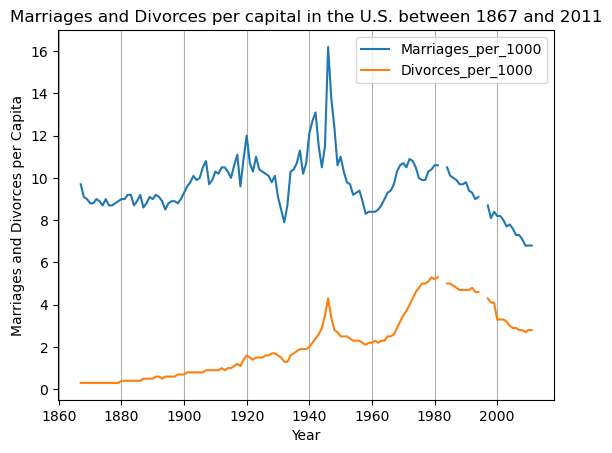

In [89]:
marriages_divorces_df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])

# set plot title
plt.title('Marriages and Divorces per capital in the U.S. between 1867 and 2011')

# set axis labels
plt.ylabel('Marriages and Divorces per Capita')
plt.xlabel('Year')

# show grid line (optional)
plt.grid(axis='x')

# show plot
plt.show()

## QUESTION 7

In [ ]:
#STEP 3
#


In [ ]:
#STEP 4
#


## QUESTION 10